## Importing Libraries and New Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [7]:
dataset = pd.read_csv('newchurndata.csv')

## Data Preparation

In [8]:
user_identifier = dataset['user']

In [9]:
dataset = dataset.drop(columns = ['user'])

### One-Hot Encoding

In [11]:
dataset.housing.value_counts() #Gives count of labels in the housing

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [12]:
dataset = pd.get_dummies(dataset) #Running the Encoding

In [13]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [14]:
#Removing some columns to avoid Dummy Variable Trap
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

### Splitting Data into Training and Testing sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'),
                                                    dataset['churn'], 
                                                    test_size=0.2,
                                                    random_state=0)

### Balancing the Training Set

Suppose our model comes out to be 60% accurate. An issue with this could be because what if there are 60% zeros, 40% ones in the target/response variable and the model chooses data points with only zeros (bias), the accuracy will still remain at 60% as it will be guessing incorrectly. The model will be biased and so the exact origin will be harder to find. Post balancing, if the accuracy results in 50%, we are assured that it is the model that is failing rather than the dataset causing it.

In [17]:
positives = y_train[y_train == 1].index

In [21]:
negatives = y_train[y_train == 0].index

In [22]:
if len(positives) > len(negatives):
    higher = positives
    lower = negatives
else:
    higher = negatives
    lower = positives

In [23]:
random.seed(0)

In [24]:
higher = np.random.choice(higher, size = len(lower)) #Randomly selects of higher indicies with a size of lower index

In [25]:
lower = np.asarray(lower)

In [26]:
new_indexes = np.concatenate((lower, higher)) 

In [27]:
X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc_X = StandardScaler()

In [31]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train)) #Convert it into dataframe as Standard Scaler returns a np array

In [32]:
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

In [33]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [34]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [35]:
X_train = X_train2
X_test = X_test2

In [38]:
#Check
print(X_train.head())
print(X_test.head())

            age  deposits  withdrawal  purchases_partners  purchases  \
11695 -0.615204 -0.360625   -0.280994           -0.592244  -0.360314   
19766 -0.414404 -0.360625   -0.280994           -0.640878  -0.360314   
8354   0.288398 -0.360625   -0.280994           -0.640878  -0.360314   
17883  0.589599 -0.360625   -0.280994            0.040007  -0.360314   
25149 -0.816005 -0.248236   -0.280994           -0.105897  -0.245756   

       cc_taken  cc_recommended  cc_disliked  cc_liked  cc_application_begin  \
11695  -0.16876       -0.915942    -0.069078 -0.076114             -0.572453   
19766  -0.16876        0.309287     1.367100 -0.076114             -0.572453   
8354   -0.16876        1.988303    -0.069078 -0.076114             -0.244821   
17883  -0.16876       -0.189880    -0.069078 -0.076114              0.000902   
25149  -0.16876       -0.586945    -0.069078 -0.076114             -0.244821   

       ...  zodiac_sign_Cancer  zodiac_sign_Capricorn  zodiac_sign_Gemini  \
11695  ..

# Model Building

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
classifier = LogisticRegression(random_state = 0)

In [42]:
classifier.fit(X_train, y_train)

C:\Users\ptpar\AppData\Local\Continuum\anaconda3\envs\dslibs\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting Test Set

In [44]:
y_pred = classifier.predict(X_test)

### Evaluating Results

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_sc = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall_sc = recall_score(y_test, y_pred)

In [49]:
print(f"Accuracy: {accuracy:.3f} \nf1 score: {f1_sc:.3f}\nPrecision: {precision:.3f}\nRecall score: {recall_sc:.3f}")

Accuracy: 0.604 
f1 score: 0.612
Precision: 0.514
Recall score: 0.755


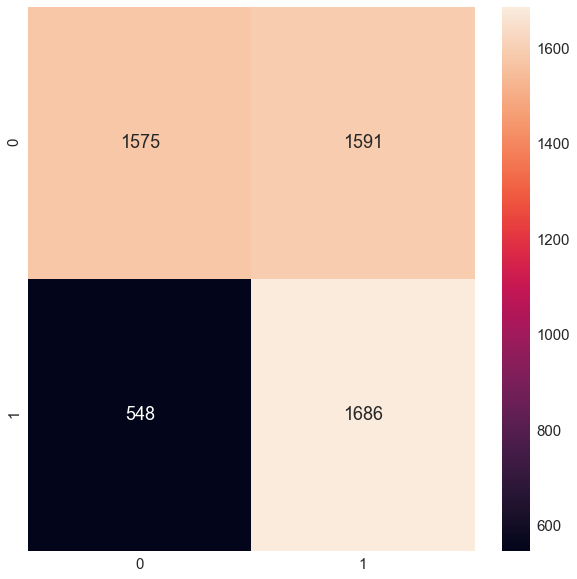

In [50]:
df_cm = pd.DataFrame(conf_matrix, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.5)
sns.heatmap(df_cm, annot=True, fmt='g')

### Cross Validation: K-Fold

In [51]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                            X=X_train,
                            y=y_train,
                            cv=10)

C:\Users\ptpar\AppData\Local\Continuum\anaconda3\envs\dslibs\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\envs\dslibs\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\envs\dslibs\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\envs\dslibs\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Con

In [52]:
accuracies.mean()

0.6440156599552572

### Analysing Coefficients

In [53]:
pd.concat([pd.DataFrame(X_train.columns, columns = ['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ['coef'])],
         axis = 1)

,features,coef
0,age,-0.143193
1,deposits,0.480681
2,withdrawal,0.047216
3,purchases_partners,-0.716233
4,purchases,-0.633201
5,cc_taken,0.076052
6,cc_recommended,0.065023
7,cc_disliked,0.005332
8,cc_liked,-0.003822
9,cc_application_begin,0.045487


### Feature Selection

We have seen above that certain columns influence the prediction more than others by noticing the higher coefficients

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [55]:
X_train.shape

(17880, 41)

In [57]:
classifier = LogisticRegression()
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

C:\Users\ptpar\AppData\Local\Continuum\anaconda3\envs\dslibs\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\envs\dslibs\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\envs\dslibs\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Continuum\anaconda3\envs\dslibs\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ptpar\AppData\Local\Con

#### Summarise the selected attributes

In [58]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False  True False  True
  True False  True  True  True  True  True  True False  True False  True
 False False False False  True  True False False False False False False
 False False False False False]


In [59]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_application_begin', 'web_user',
       'ios_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'reward_rate', 'housing_O', 'payment_type_Weekly',
       'zodiac_sign_Aquarius'],
      dtype='object')

In [60]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 18, 19,  1, 14,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  7,  1, 15,  1, 12,  4,  6,  5,  1,  1, 13, 22,  3,  8,
       21,  9, 16, 17, 11, 10, 20])

### Re-evaluating the model

C:\Users\ptpar\AppData\Local\Continuum\anaconda3\envs\dslibs\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.605 
f1 score: 0.614
Precision: 0.516
Recall score: 0.758


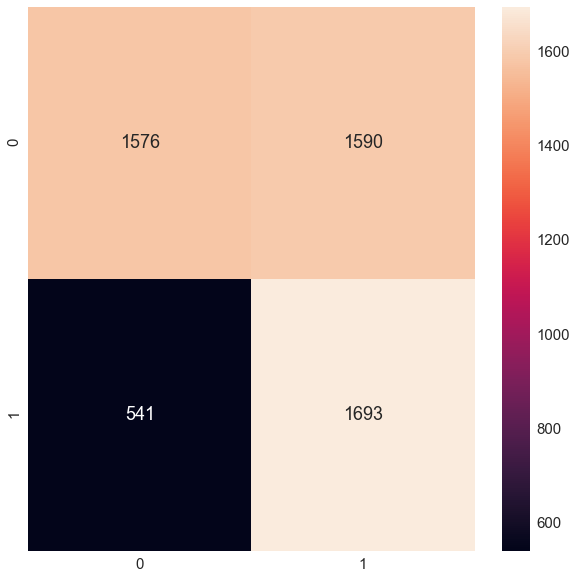

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

y_pred1 = classifier.predict(X_test[X_test.columns[rfe.support_]])

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

conf_matrix1 = confusion_matrix(y_test, y_pred1)
accuracy = accuracy_score(y_test, y_pred1)
f1_sc = f1_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall_sc = recall_score(y_test, y_pred1)

df_cm1 = pd.DataFrame(conf_matrix1, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.5)
sns.heatmap(df_cm1, annot=True, fmt='g')
print(f"Accuracy: {accuracy:.3f} \nf1 score: {f1_sc:.3f}\nPrecision: {precision:.3f}\nRecall score: {recall_sc:.3f}")

### Re-analysing Coefficients

In [63]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ['coef'])],
         axis = 1)

,features,coef
0,age,-0.145920
1,deposits,0.480761
2,withdrawal,0.049450
3,purchases_partners,-0.709750
4,purchases,-0.633634
5,cc_taken,0.080420
6,cc_recommended,0.071055
7,cc_application_begin,0.050977
8,web_user,0.111619
9,ios_user,0.080378


# Final Result

In [65]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['Predicted_Churn'] = y_pred1
final_results = final_results[['user', 'churn', 'Predicted_Churn']]

In [66]:
final_results

,user,churn,Predicted_Churn
4,61353,1.0,1
7,67679,0.0,0
8,21269,0.0,0
18,69531,0.0,1
22,25997,0.0,0
...,...,...,...
26982,22377,0.0,1
26991,24291,1.0,1
26993,23740,0.0,1
26994,47663,1.0,0


# Conclusion

- Our model has provided us with an idea of which users are likely to churn. We have purposefully left the date of the expected churn open-ended because we are only focusing on gauging the features that indicate disengagement with the product and not the timeframe in which they will stop interacting. 


- If we want to transition into predicting churn more accurately, we can add a new dimension of time so we can specifically tailor to those who will leave the product.